# Fitbit Progress

<b>Katriona Goldmann</b>

This script looks at the general activity of the user. Inspired by by [Stephen Hsu's analysis](https://towardsdatascience.com/collect-your-own-fitbit-data-with-python-ff145fa10873) ([code here](https://github.com/stephenjhsu/fitbit/blob/master/Fitbit%20Exploration.ipynb)) and [Matt's Gamification of fitbit](https://towardsdatascience.com/the-gamification-of-fitbit-how-an-api-provided-the-next-level-of-training-eaf7b267af00).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import plotly.io as pio
import datetime

%matplotlib inline

## Read in the data and merge

In [24]:
ex = pd.read_csv("./Outputs/exercise.csv")
summary = pd.read_csv("./Outputs/daily_summary.csv")
sleep = pd.read_csv("./Outputs/sleep_summary.csv")

In [25]:
daily = pd.merge(summary, sleep, how='outer', left_on='date', right_on='Date')

In [27]:
daily = daily.dropna(1, 'all')

In [29]:
daily.head()

,Cardio (mins at HR),Fat Burn (mins at HR),Out of Range/low (mins at HR),Peak (mins at HR),caloriesOut,fairlyActiveMinutes,lightlyActiveMinutes,restingHeartRate,sedentaryMinutes,steps,...,date,Unnamed: 0,Bedtime (mins),Date,Time asleep (mins),Time awake (mins),Time in bed (mins),Time very awake (mins),Total time,Wake up (mins)
0,0.0,19.0,562.0,0.0,1691.0,13.0,98.0,62.0,1282.0,8767.0,...,25/12/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,53.0,1387.0,0.0,1762.0,34.0,117.0,57.0,641.0,9909.0,...,26/12/2018,0.0,00:26:30,26/12/2018,607.0,11.0,618.0,0.0,10.28,10:43:30
2,0.0,13.0,1427.0,0.0,1755.0,30.0,209.0,57.0,642.0,6038.0,...,27/12/2018,0.0,00:10:30,27/12/2018,539.0,14.0,559.0,6.0,9.30,09:28:30
3,50.0,48.0,1243.0,0.0,2144.0,10.0,249.0,58.0,542.0,7465.0,...,28/12/2018,0.0,23:47:30,28/12/2018,575.0,8.0,583.0,0.0,-14.30,09:29:30
4,0.0,53.0,1311.0,0.0,1849.0,17.0,176.0,60.0,623.0,10049.0,...,29/12/2018,0.0,23:02:00,29/12/2018,566.0,25.0,601.0,10.0,-14.00,09:02:00


## Plot trends over time

Create a trace for each parameter and normalise to 1 so it plots on one scale.

In [48]:
traces = []
omit_vars = [daily.columns.get_loc(c) for c in daily.columns if c in \
             ['Unnamed: 0', 'date', 'Date', 'Peak (mins at HR)', 'Bedtime (mins)', 'Wake up (mins)', 'Total time']]


for i in [ind for ind in range(1,len(daily.columns)) if ind not in omit_vars]:
    var = list(daily.columns.values)[i]
    xval = daily['date'][np.logical_not(np.isnan(daily[var]))]
    ynorm = [x for x in daily[var] if str(x) != 'nan'] 
    ynorm= [float(i)/max(ynorm) for i in ynorm]
    
    vis = True if var in ['caloriesOut', 'lightlyActiveMinutes', 'steps'] else "legendonly"
    traces.append(go.Scatter(x = xval, y=ynorm, text = daily[var], mode = 'lines', name=var, visible= vis, hoverinfo='text'))

Fat Burn (mins at HR)
Out of Range/low (mins at HR)
caloriesOut
fairlyActiveMinutes
lightlyActiveMinutes
restingHeartRate
sedentaryMinutes
steps
veryActiveMinutes
Time asleep (mins)
Time awake (mins)
Time in bed (mins)
Time very awake (mins)


In [49]:
layout = go.Layout(title='Daily Activity',yaxis = dict(showline=False, ticks='', showticklabels=False))
fig = go.Figure(traces, layout)
py.iplot(fig, filename='Daily-Activity')

/Users/PhD/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [50]:
pio.write_image(fig, './figs/daily_activity.png')

## How do these correlate?

In [51]:
import scipy
import scipy.cluster.hierarchy as sch

corrd = daily.corr()
corrd = corrd.dropna(0, thresh=8) 
corrd = corrd.dropna(1, thresh=8) 
corrd

,Cardio (mins at HR),Fat Burn (mins at HR),Out of Range/low (mins at HR),Peak (mins at HR),caloriesOut,fairlyActiveMinutes,lightlyActiveMinutes,restingHeartRate,sedentaryMinutes,steps,veryActiveMinutes,Time asleep (mins),Time awake (mins),Time in bed (mins),Time very awake (mins),Total time
Cardio (mins at HR),1.000000,0.308110,0.063783,0.352870,0.291395,-0.130651,0.072873,0.237522,-0.080440,0.177627,0.297819,0.092561,-0.112221,0.073100,-0.134037,-0.098583
Fat Burn (mins at HR),0.308110,1.000000,0.400731,0.235544,0.743944,0.500821,0.212551,0.449497,-0.345794,0.797939,0.830372,-0.285973,-0.048488,-0.278591,0.067866,-0.212098
Out of Range/low (mins at HR),0.063783,0.400731,1.000000,-0.025955,0.442658,0.264723,0.312002,0.566339,-0.708105,0.374221,0.335464,0.201347,0.106952,0.208614,0.075418,-0.083386
Peak (mins at HR),0.352870,0.235544,-0.025955,1.000000,0.171582,-0.054685,-0.067242,0.179402,0.120748,0.191717,0.249052,-0.119367,-0.266683,-0.146112,-0.121281,-0.046781
caloriesOut,0.291395,0.743944,0.442658,0.171582,1.000000,0.655747,0.707708,0.262531,-0.530451,0.953499,0.698376,-0.251704,0.089076,-0.236239,-0.011268,-0.132041
fairlyActiveMinutes,-0.130651,0.500821,0.264723,-0.054685,0.655747,1.000000,0.396867,0.159498,-0.289388,0.691231,0.451066,-0.180758,-0.208967,-0.192896,0.038044,0.027462
lightlyActiveMinutes,0.072873,0.212551,0.312002,-0.067242,0.707708,0.396867,1.000000,-0.169495,-0.642217,0.538559,0.028774,-0.056575,0.300401,-0.027235,-0.006919,0.136991
restingHeartRate,0.237522,0.449497,0.566339,0.179402,0.262531,0.159498,-0.169495,1.000000,-0.302131,0.284456,0.517095,0.180045,-0.185485,0.161218,0.085027,-0.150611
sedentaryMinutes,-0.080440,-0.345794,-0.708105,0.120748,-0.530451,-0.289388,-0.642217,-0.302131,1.000000,-0.412343,-0.129493,-0.327737,-0.278234,-0.349078,-0.119104,0.031438
steps,0.177627,0.797939,0.374221,0.191717,0.953499,0.691231,0.538559,0.284456,-0.412343,1.000000,0.800118,-0.294273,0.053581,-0.280618,-0.007213,-0.187246


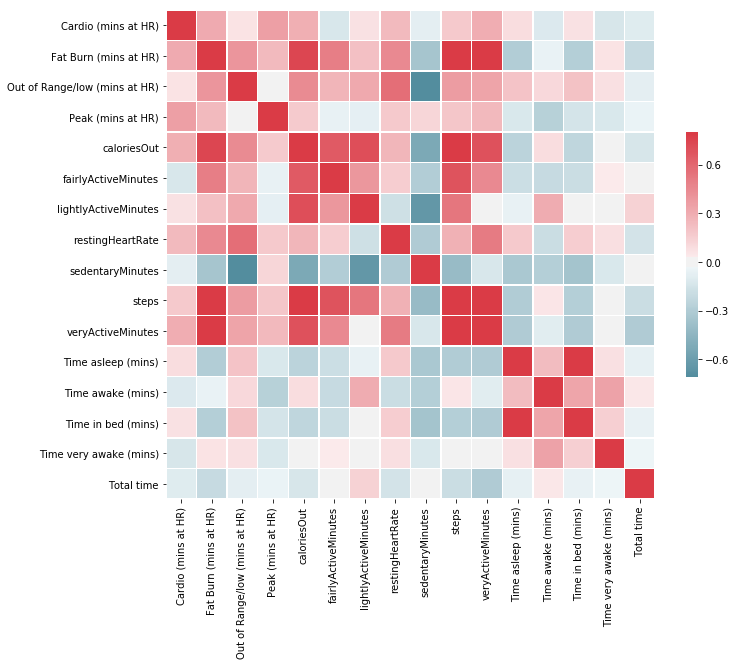

In [52]:
anchor_val = .8

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig_corr = sns.heatmap(corrd,  cmap=cmap, vmax=anchor_val,square=True, center=0, \
            xticklabels=True, yticklabels=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

fig = fig_corr.get_figure()

In [53]:
fig.savefig("./figs/Correlations.png") 

## Now lets look at sleep

The gold line indicates the desired 8 hours of sleep

In [59]:
trace1 = go.Bar(x=daily['date'], y=daily['Time asleep (mins)'] / 60, name='Asleep')
trace2 = go.Bar(x=daily['date'], y=daily['Time awake (mins)'] / 60, name='Awake')
trace3 = go.Bar(x=daily['date'], y=daily['Time very awake (mins)'] / 60, name='Very Awake')

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack',
    title="Hours in bed",
    shapes=[
        {
            'type': 'line',
            'x0': daily['date'][0],
            'y0': 8,
            'x1': daily['date'][len(daily['date']) - 1],
            'y1': 8,
            'line': {
                'color': 'gold',
                'width': 3
            },
        },
    ])

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

/Users/PhD/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [57]:
pio.write_image(fig, './figs/sleep_dist.png')

In [58]:
print('Only getting the full 8 hours ' + \
      str(round(100*len([x for x in daily['Time asleep (mins)'] if x > 8*60])/len(daily['Time asleep (mins)']))) + \
      '% of the time')

Only getting the full 8 hours 36% of the time
